<a href="https://colab.research.google.com/github/PauloP206/Curso-Python/blob/main/EXAMEN_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

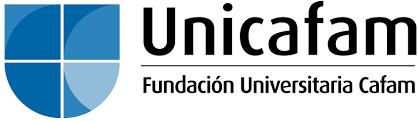


EXAMEN FINAL

CURSO DE PYTHON

DIRECCION DE EDUCACIÓN CONTINUA

FUNDACION UNIVERSITARIA CAFAM

DOCENTE: NICOLAS MOJICA GOMEZ

ESTUDIANTE: **PAULO CASTELLANOS**


El departamento de policía esta bastante preocupado por el aumento de la criminalidad en nlos
diferentes estados de la unión americana, y aunque tienen toda la intención de poder cubrir todos
los eventos el problema radica en que hay una cantidad limitada de recursos y cada uno con
diferentes habilidades entonces no sabe cómo centrar los esfuerzos para poder combatir la
criminalidad.
Actualmente se tienen 50 estados y se disponen de 3 tipos de recursos, los policías capacitados
para atender asaltos y asesinatos, que son alrededor de 300, por otra parte los policías de a pie que
atienden raponazos y delincuencia común, que son alrededor de 500 y por ultimo tenemos a los
cadetes, que son alrededor de 150. Estos solo pueden atender casos de baja complejidad.
De acuerdo con las ocurrencias presentadas en el set de datos dado genere propuestas de
asignación de los recursos a cada uno de los estados dependiendo de las clasificaciones del nivel de
complejidad que tienen y así poder darle a la policía una sugerencia clara de cómo puede
aprovechar mejor los recursos.

1. ¿Como podemos agrupar los estados?

2. ¿Cuáles son los estados con necesidad de profesionales con mayor capacidad de atención al crimen?

3. ¿Cómo distribuiría los recursos?

4. ¿Cuáles son los grupos que existen dentro del comportamiento de la criminalidad?

5. Recomendaciones finales


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
dataset=pd.read_csv('/content/sample_data/crime_data.csv')

In [ ]:
dataset

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


***1- ¿Como podemos agrupar los estados?***

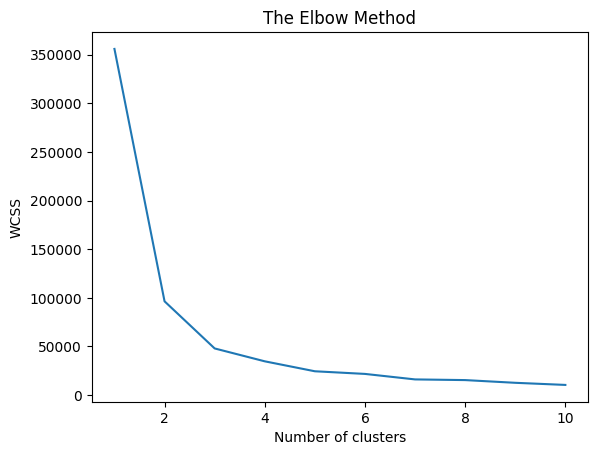

        Unnamed: 0  Cluster
0          Alabama        4
1           Alaska        2
2          Arizona        1
3         Arkansas        4
4       California        2
5         Colorado        2
6      Connecticut        3
7         Delaware        3
8          Florida        1
9          Georgia        4
10          Hawaii        3
11           Idaho        0
12        Illinois        1
13         Indiana        3
14            Iowa        0
15          Kansas        3
16        Kentucky        0
17       Louisiana        4
18           Maine        0
19        Maryland        1
20   Massachusetts        3
21        Michigan        2
22       Minnesota        0
23     Mississippi        4
24        Missouri        3
25         Montana        0
26        Nebraska        0
27          Nevada        2
28   New Hampshire        0
29      New Jersey        3
30      New Mexico        1
31        New York        1
32  North Carolina        4
33    North Dakota        0
34            Ohio  

In [ ]:
# Seleccionar las columnas para el clustering (usaremos 'Murder', 'Assault', 'UrbanPop', 'Rape') y todas las filas
X = dataset.iloc[:, [1,2,3,4]].values


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Ver los estados agrupados por cluster
print(dataset[['Unnamed: 0', 'Cluster']])

RTA= El codo esta en 5 closter

***2- ¿Cuáles son los estados con necesidad de profesionales con mayor capacidad de atención al crimen?***

In [ ]:
# Agrupar por el cluster y calcular los promedios de la criminalidad por asesinatos y asaltos
cluster_means = dataset.groupby('Cluster')[['Murder', 'Assault']].mean()

# Ver los promedios por cluster
print(cluster_means)

            Murder     Assault
Cluster                       
0         2.950000   62.700000
1        11.540000  253.100000
2         8.214286  173.285714
3         5.590000  112.400000
4        12.266667  305.000000


Clusters mas peligrosos en función de asesinatos y asaltos:

1) 4

2) 1

3) 2

4) 3

5) 0

In [ ]:
# Entrenamiento de K-means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Agregar el cluster asignado a cada estado a el dataset
dataset['Cluster'] = y_kmeans

# Ver los estados con más necesidades de profesionales
df_cluster_1 = dataset[dataset['Cluster'] == 4]  # Cluster con más crimen
df_cluster_1.sort_values(by=['Murder', 'Assault'], ascending=True)



,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
2,Arizona,8.1,294,80,31.0,4
19,Maryland,11.3,300,67,27.8,4
30,New Mexico,11.4,285,70,32.1,4
32,North Carolina,13.0,337,45,16.1,4
39,South Carolina,14.4,279,48,22.5,4
8,Florida,15.4,335,80,31.9,4


RTA= Se observa que el cluster con mayor criminalidad es el 4;
- Arizona
- Maryland
- New Mexico
- North Carolina
- South Carolina
- Florida

***3- ¿Cómo distribuiría los recursos?***

In [ ]:
policías_capacitados =300
policías_pie=500
cadetes=150

asignación_agentes={}

# Calcular la cantidad de recursos a asignar proporcionalmente a cada cluster
total_estados = len(dataset)  # Total de estados en el dataset
print('Total de estados')
print(total_estados)
clusters_estados = dataset['Cluster'].value_counts()  # Cantidad de estados en cada cluster
print('Cantidad de estados por cluster')
print(clusters_estados)

# Distribuir los recursos proporcionalmente
for i in range(5):  # Para cada cluster (de 0 a 4)
    cluster_tamano = clusters_estados[i]  # Número de estados en este cluster
    proporcion = cluster_tamano / total_estados  # Proporción de estados en este cluster

    # Asignar los policias proporcionalmente
    asignación_agentes[i] = {
        'policías capacitados': int(policías_capacitados * proporcion),
        'policías a pie': int(policías_pie * proporcion),
        'cadetes': int(cadetes * proporcion)
    }

# Mostrar la distribución de recursos
print(asignación_agentes)


Total de estados
50
Cantidad de estados por cluster
Cluster
2    14
1    10
3    10
0    10
4     6
Name: count, dtype: int64
{0: {'policías capacitados': 60, 'policías a pie': 100, 'cadetes': 30}, 1: {'policías capacitados': 60, 'policías a pie': 100, 'cadetes': 30}, 2: {'policías capacitados': 84, 'policías a pie': 140, 'cadetes': 42}, 3: {'policías capacitados': 60, 'policías a pie': 100, 'cadetes': 30}, 4: {'policías capacitados': 36, 'policías a pie': 60, 'cadetes': 18}}


***4- ¿Cuáles son los grupos que existen dentro del comportamiento de la criminalidad?***

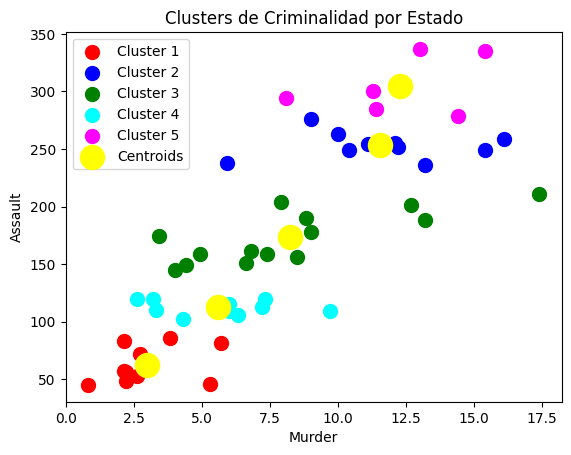

In [ ]:
# Grupos dentro del comportamiento de asaltos y asesinatos.
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de Criminalidad por Estado')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()


***5- Recomendaciones finales***

Se encontraron los estados con mayor criminalidad y estos se dividieron en grupos en donde a cada uno se les asigno un numero de agentes basados en que existen 5 niveles de peligro: Mayor peligro,Alto, Medio Alto, Medio y bajo